✅ 'Group' column created from 'CDR'
✅ Data Loaded:
Cross-sectional shape: (436, 13)
Longitudinal shape: (373, 15)

📋 Cross-sectional Columns: ['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Delay', 'Group']

📋 Longitudinal Columns: ['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Group
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,Nondemented
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,Nondemented
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,Very Mild Dementia
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,NaN


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034



🔍 Missing Data - Cross-sectional:


,Missing Values,Missing %,Data Type
Delay,416,95.412844,float64
SES,220,50.458716,float64
Educ,201,46.100917,float64
MMSE,201,46.100917,float64
CDR,201,46.100917,float64
Group,201,46.100917,object
ID,0,0.000000,object
M/F,0,0.000000,object
Hand,0,0.000000,object
Age,0,0.000000,int64



🔍 Missing Data - Longitudinal:


,Missing Values,Missing %,Data Type
SES,19,5.093834,float64
MMSE,2,0.536193,float64
Subject ID,0,0.000000,object
MRI ID,0,0.000000,object
Group,0,0.000000,object
Visit,0,0.000000,int64
MR Delay,0,0.000000,int64
M/F,0,0.000000,object
Hand,0,0.000000,object
Age,0,0.000000,int64



📊 Unique Value Counts:
🔹 Group (Cross-sectional): ['Nondemented' 'Very Mild Dementia' nan 'Mild Dementia'
 'Moderate Dementia']
🔹 Group (Longitudinal): ['Nondemented' 'Demented' 'Converted']
🔹 M/F (Cross-sectional): ['F' 'M']
🔹 M/F (Longitudinal): ['M' 'F']
🔹 Hand (Cross-sectional): ['R']
🔹 Hand (Longitudinal): ['R']
🔹 CDR (Cross-sectional): [0.  0.5 nan 1.  2. ]
🔹 CDR (Longitudinal): [0.  0.5 1.  2. ]
🔹 EDUC (Longitudinal): [14 12 18 16  8 20 13  6 17 15 23 11]
🔹 SES (Cross-sectional): [ 3.  1. nan  2.  4.  5.]
🔹 SES (Longitudinal): [ 2. nan  3.  4.  1.  5.]


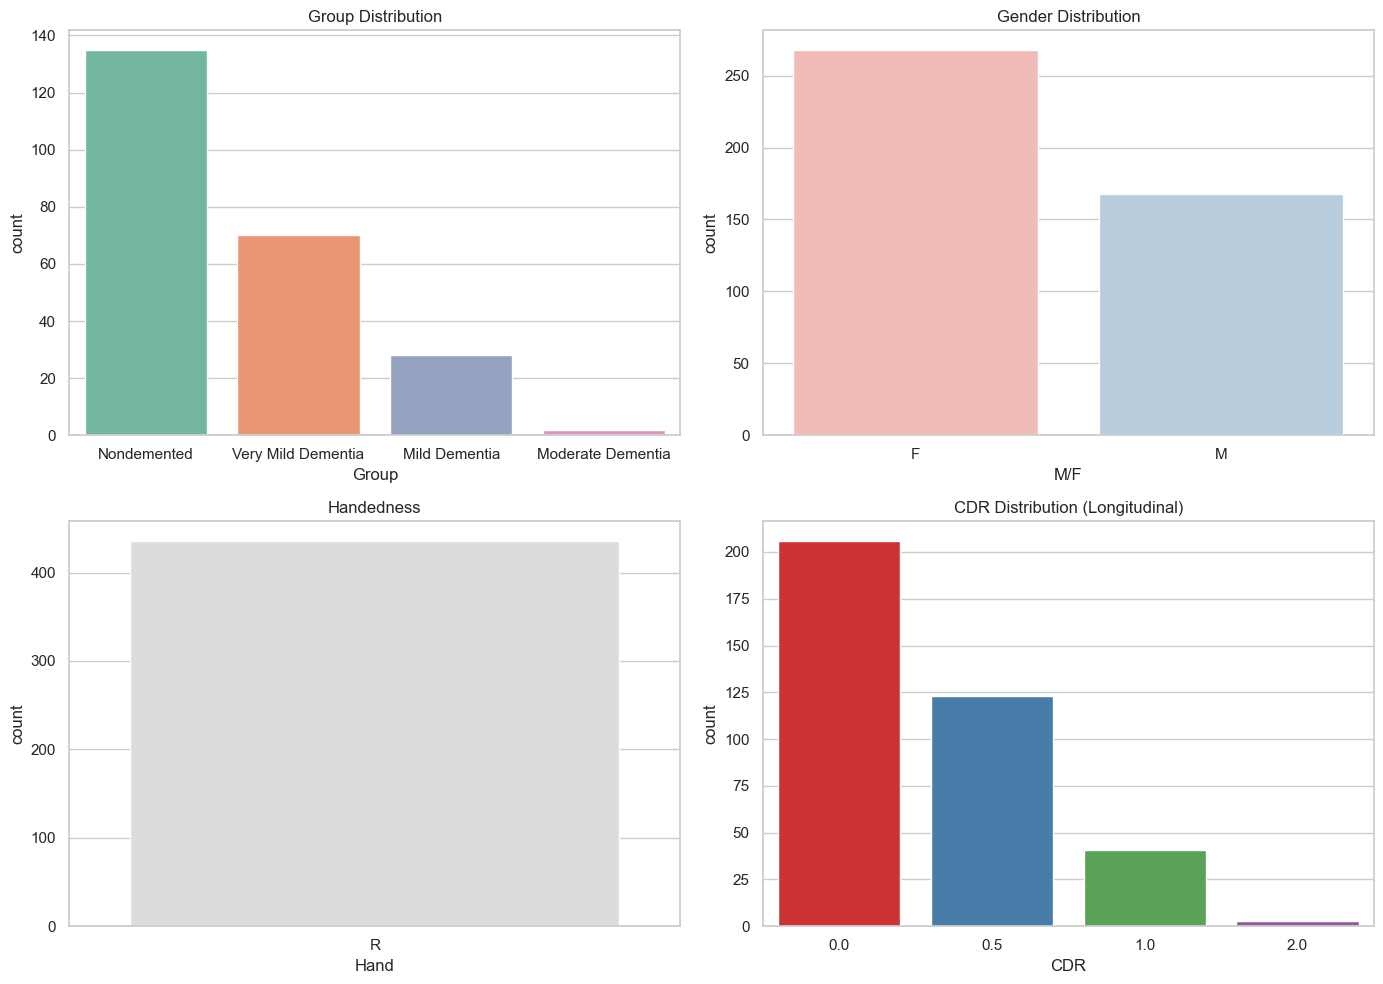

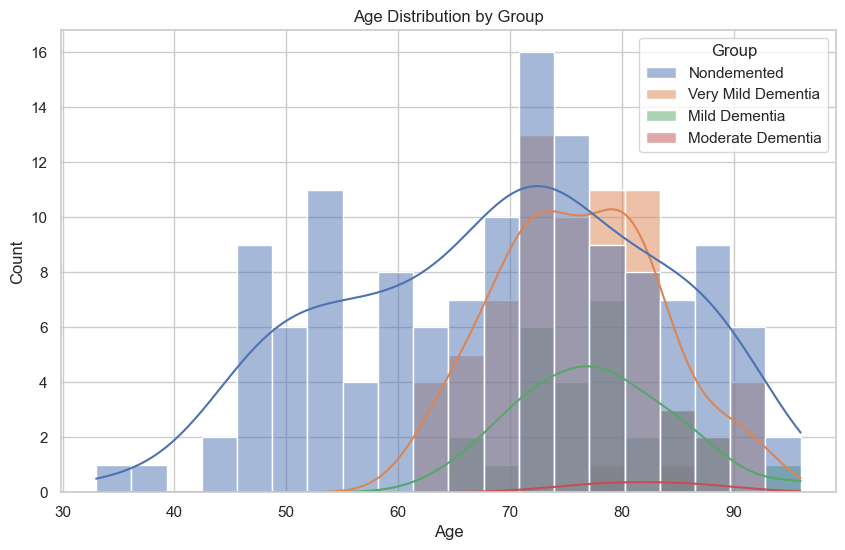

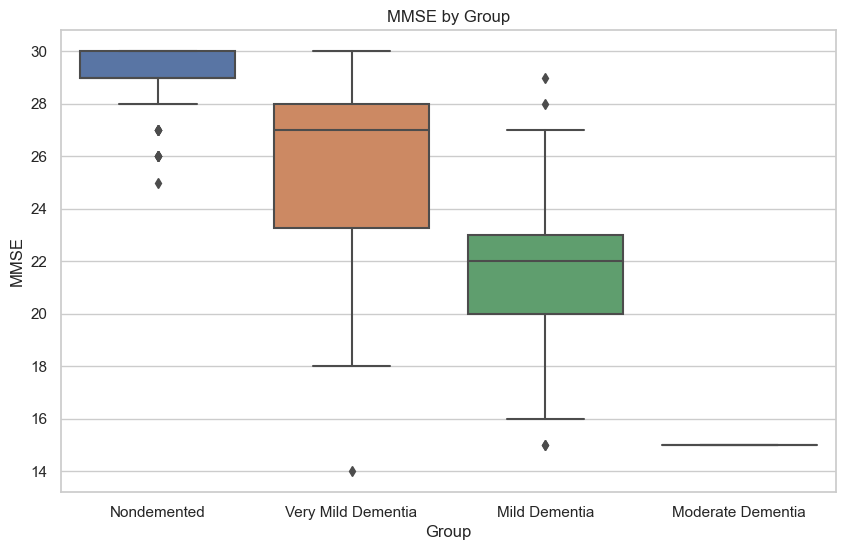

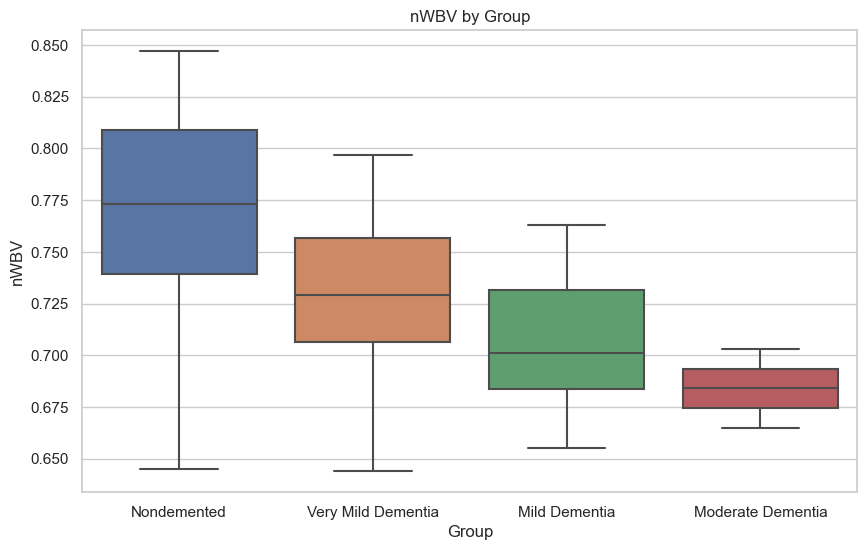

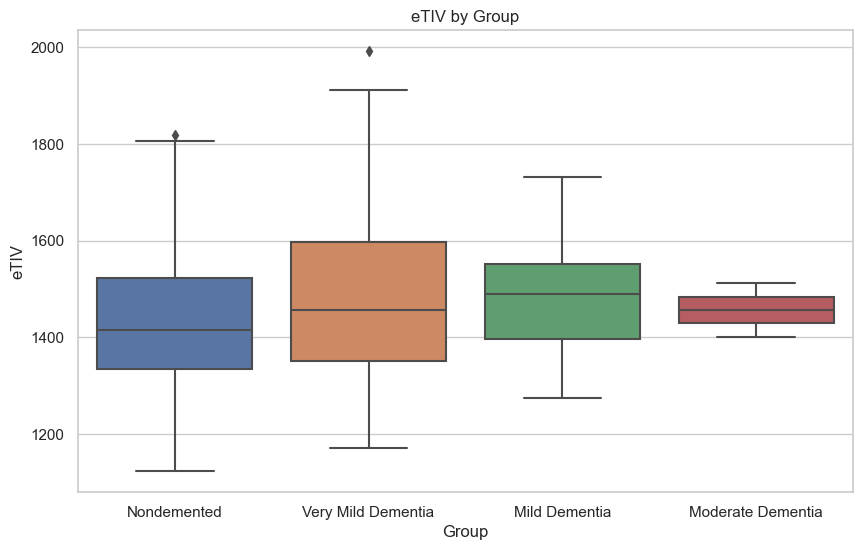

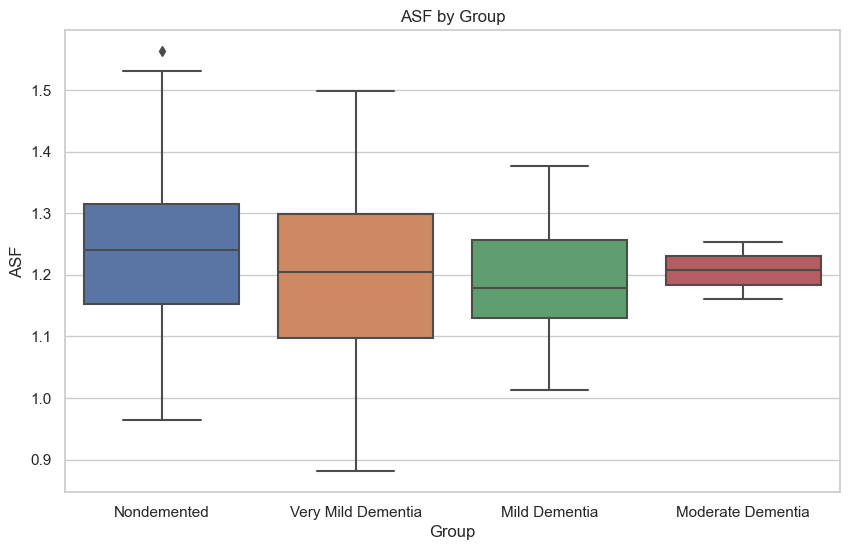

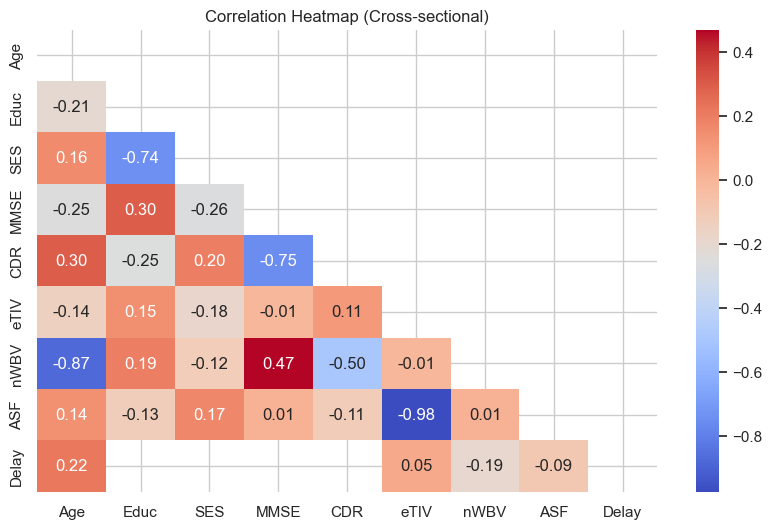


🚨 Outliers (> 3 std dev):
Age     0
MMSE    0
nWBV    0
eTIV    1
dtype: int64


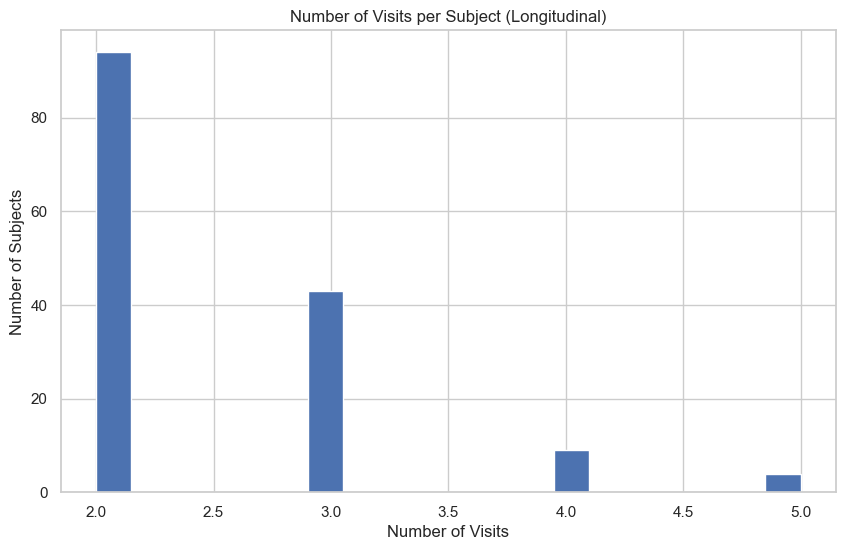

✅ EDA summaries saved to /data/processed/clinical/

📌 EDA Summary:
- Group column generated from CDR if missing.
- MMSE, nWBV, eTIV are useful clinical indicators.
- Some missing values exist in SES, MMSE, EDUC.
- Ready for next step: Preprocessing & Cleaning.


In [4]:
# 🧠 Alzheimer's Clinical Data EDA - Final Spotless Version

# ====================
# 1. Imports
# ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', 100)

# ====================
# 2. Load Data
# ====================
cross_sec = pd.read_csv("../data/raw/clinical/oasis_cross-sectional.csv")
longitudinal = pd.read_csv("../data/raw/clinical/oasis_longitudinal.csv")

# ✅ Clean column names
cross_sec.columns = cross_sec.columns.str.strip()
longitudinal.columns = longitudinal.columns.str.strip()

# ====================
# 3. Create Group Column (if missing)
# ====================
if 'Group' not in cross_sec.columns and 'CDR' in cross_sec.columns:
    def map_group(cdr):
        if pd.isnull(cdr):
            return np.nan
        elif cdr == 0.0:
            return 'Nondemented'
        elif cdr == 0.5:
            return 'Very Mild Dementia'
        elif cdr == 1.0:
            return 'Mild Dementia'
        elif cdr == 2.0:
            return 'Moderate Dementia'
        else:
            return 'Unknown'
    
    cross_sec['Group'] = cross_sec['CDR'].apply(map_group)
    print("✅ 'Group' column created from 'CDR'")

# ====================
# 4. Overview
# ====================
print("✅ Data Loaded:")
print(f"Cross-sectional shape: {cross_sec.shape}")
print(f"Longitudinal shape: {longitudinal.shape}")
print("\n📋 Cross-sectional Columns:", cross_sec.columns.tolist())
print("\n📋 Longitudinal Columns:", longitudinal.columns.tolist())

display(cross_sec.head())
display(longitudinal.head())

# ====================
# 5. Missing Data Summary
# ====================
def null_summary(df):
    return pd.DataFrame({
        'Missing Values': df.isnull().sum(),
        'Missing %': 100 * df.isnull().sum() / len(df),
        'Data Type': df.dtypes
    }).sort_values(by='Missing %', ascending=False)

print("\n🔍 Missing Data - Cross-sectional:")
display(null_summary(cross_sec))

print("\n🔍 Missing Data - Longitudinal:")
display(null_summary(longitudinal))

# ====================
# 6. Unique Categorical Values
# ====================
cat_cols = ['Group', 'M/F', 'Hand', 'CDR', 'EDUC', 'SES']
print("\n📊 Unique Value Counts:")
for col in cat_cols:
    if col in cross_sec.columns:
        print(f"🔹 {col} (Cross-sectional): {cross_sec[col].unique()}")
    if col in longitudinal.columns:
        print(f"🔹 {col} (Longitudinal): {longitudinal[col].unique()}")

# ====================
# 7. Count Plots
# ====================
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

if 'Group' in cross_sec.columns:
    sns.countplot(x='Group', data=cross_sec, ax=axs[0,0], palette='Set2')
    axs[0,0].set_title('Group Distribution')
else:
    axs[0,0].text(0.5, 0.5, 'Missing: Group', ha='center')

if 'M/F' in cross_sec.columns:
    sns.countplot(x='M/F', data=cross_sec, ax=axs[0,1], palette='Pastel1')
    axs[0,1].set_title('Gender Distribution')

if 'Hand' in cross_sec.columns:
    sns.countplot(x='Hand', data=cross_sec, ax=axs[1,0], palette='coolwarm')
    axs[1,0].set_title('Handedness')

if 'CDR' in longitudinal.columns:
    sns.countplot(x='CDR', data=longitudinal, ax=axs[1,1], palette='Set1')
    axs[1,1].set_title('CDR Distribution (Longitudinal)')

plt.tight_layout()
plt.show()

# ====================
# 8. Age Distribution
# ====================
if 'Age' in cross_sec.columns and 'Group' in cross_sec.columns:
    sns.histplot(data=cross_sec, x='Age', hue='Group', kde=True, bins=20)
    plt.title("Age Distribution by Group")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

# ====================
# 9. Boxplots for Features
# ====================
features = ['MMSE', 'nWBV', 'eTIV', 'ASF']
for feature in features:
    if feature in cross_sec.columns and 'Group' in cross_sec.columns:
        sns.boxplot(x='Group', y=feature, data=cross_sec)
        plt.title(f"{feature} by Group")
        plt.show()

# ====================
# 10. Correlation Matrix
# ====================
num_cols = cross_sec.select_dtypes(include=[np.number]).columns
corr = cross_sec[num_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title("Correlation Heatmap (Cross-sectional)")
plt.show()

# ====================
# 11. Outlier Detection
# ====================
outlier_cols = ['Age', 'MMSE', 'nWBV', 'eTIV']
z_scores = cross_sec[outlier_cols].apply(zscore)
outliers = (np.abs(z_scores) > 3).sum()

print("\n🚨 Outliers (> 3 std dev):")
print(outliers)

# ====================
# 12. Longitudinal Visit Analysis
# ====================
if 'Subject ID' in longitudinal.columns:
    visits_per_subject = longitudinal['Subject ID'].value_counts()
    visits_per_subject.hist(bins=20)
    plt.title("Number of Visits per Subject (Longitudinal)")
    plt.xlabel("Number of Visits")
    plt.ylabel("Number of Subjects")
    plt.show()

# ====================
# 13. Save EDA Summaries
# ====================
cross_sec.describe(include='all').to_csv("../data/processed/clinical/eda_summary_cross_sectional.csv")
longitudinal.describe(include='all').to_csv("../data/processed/clinical/eda_summary_longitudinal.csv")

print("✅ EDA summaries saved to /data/processed/clinical/")

# ====================
# 14. Final Notes
# ====================
print("\n📌 EDA Summary:")
print("- Group column generated from CDR if missing.")
print("- MMSE, nWBV, eTIV are useful clinical indicators.")
print("- Some missing values exist in SES, MMSE, EDUC.")
print("- Ready for next step: Preprocessing & Cleaning.")
